In [1]:
from sklearn.datasets import fetch_openml 
mnist = fetch_openml('mnist_784', as_frame=False) 

In [2]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [3]:
print (mnist.data.shape) 
print (mnist.target.shape) 
print (mnist.data[0] )
print (mnist.data[0][1] )
print (mnist.data[:,1] )
print (mnist.data[:100] )

(70000, 784)
(70000,)
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.

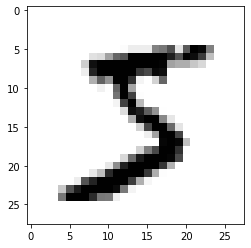

class = 5


In [4]:
import matplotlib.pyplot as plt 
images = mnist.data.reshape((-1, 28, 28)) 
plt.imshow(images[0],cmap=plt.cm.gray_r,interpolation="nearest") 
plt.show()
print(f'class = {mnist.target[0]}')

In [5]:
from sklearn.model_selection import train_test_split

xtrain,  xtest,  ytrain,  ytest  =  train_test_split(mnist.data,  mnist.target, 
train_size=0.7) 

print(xtrain.shape)
print(xtest.shape)

(49000, 784)
(21000, 784)


In [6]:
from sklearn import neighbors
#n_neighbors = int(xtest.shape[0]/len(set(mnist.target))*10)
n_neighbors = 10
print(f'n_neighbors selected = {n_neighbors}\n')
clf = neighbors.KNeighborsClassifier(n_neighbors) 

clf.fit(xtrain, ytrain) 
print(f'prediction of 100 first examples :\n {clf.predict(xtest[:100])}\n')
print(f'proba of 10 first examples :\n{clf.predict_proba(xtest[:10])}\n')
print(f'Score on all test set = {clf.score(xtest, ytest)}\n')

n_neighbors selected = 10

prediction of 100 first examples :
 ['9' '2' '5' '9' '4' '5' '3' '1' '3' '7' '9' '4' '6' '2' '7' '8' '4' '6'
 '2' '3' '6' '8' '2' '5' '7' '3' '3' '6' '4' '5' '3' '7' '1' '2' '1' '5'
 '4' '1' '3' '1' '5' '7' '9' '8' '3' '1' '3' '0' '8' '0' '1' '4' '2' '6'
 '6' '6' '6' '6' '8' '8' '3' '9' '2' '0' '2' '6' '9' '2' '8' '8' '7' '0'
 '1' '8' '5' '3' '5' '3' '7' '7' '1' '7' '1' '9' '8' '7' '8' '6' '8' '3'
 '5' '1' '2' '2' '0' '0' '3' '9' '6' '3']

proba of 10 first examples :
[[0.  0.  0.  0.  0.  0.  0.  0.  0.  1. ]
 [0.  0.  0.7 0.3 0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  1. ]
 [0.  0.  0.  0.  0.6 0.  0.  0.1 0.  0.3]
 [0.  0.  0.  0.  0.1 0.9 0.  0.  0.  0. ]
 [0.  0.  0.  0.7 0.  0.  0.  0.  0.3 0. ]
 [0.  1.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  1.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  1.  0.  0. ]]

Score on all test set = 0.9677619047619047



In [7]:
# Exercice 2 

from sklearn.datasets import fetch_openml 
from sklearn import neighbors
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import KFold
import pickle
import time

def selectRandomData(x,y, number):
    indexes = np.random.randint(y.size, size=number)
    return np.array([x[i] for i in indexes]),np.array([y[i] for i in indexes])

n_neighbors selected = 10



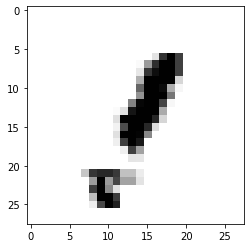

class = 1
Score on all test set = 0.923



In [62]:


# Data selection
NUMBER_DATA = 5000
REPARTITION_TRAIN_TEST = 0.8
mnist = fetch_openml('mnist_784', as_frame=False) # Extraction
X,y = selectRandomData(x=mnist.data,y=mnist.target,number=NUMBER_DATA) # Random selection
Xtrain,  Xtest,  ytrain,  ytest  =  train_test_split(X,y, train_size=REPARTITION_TRAIN_TEST) # Splitting train and test set

# Training
N_NEIGHBORS = 10
print(f'n_neighbors selected = {N_NEIGHBORS}\n')
clf = neighbors.KNeighborsClassifier(N_NEIGHBORS) 
clf.fit(Xtrain, ytrain) 

# Printing image 4
image_4 = Xtest[3]
plt.imshow(image_4.reshape(28, 28) ,cmap=plt.cm.gray_r,interpolation="nearest") 
plt.show()
to_predict = image_4.reshape(1, -1)
print(f'class = {clf.predict(to_predict)[0]}')

# Testing
#print(f'prediction of 100 first examples :\n {clf.predict(Xtest[:100])}\n')
#print(f'proba of 10 first examples :\n{clf.predict_proba(Xtest[:10])}\n')
print(f'Score on all test set = {clf.score(Xtest, ytest)}\n')


In [73]:

# Data extraction and selection
NUMBER_DATA = 5000
mnist = fetch_openml('mnist_784', as_frame=False) # Extraction
X,y = selectRandomData(x=mnist.data,y=mnist.target,number=NUMBER_DATA) # Random selection

# Splitting with k-fold
N_SPLITS = 10
kf = KFold(n_splits=N_SPLITS,shuffle=True)
kf.get_n_splits(X)

# Train and test for different n_neighbors
scores = []
for n_neighbors in range(2,16):
    score = 0
    clf = neighbors.KNeighborsClassifier(n_neighbors) 
    
    for train_index, test_index in kf.split(X):
        clf.fit(X[train_index], y[train_index])
        score +=  clf.score(X[test_index], y[test_index])
    scores.append(score/N_SPLITS)
    
best_i = -1
best_score = -1
for i,score in enumerate(scores):
    if(best_score<score):
        best_score = score
        best_i = i
print(f'Best is n_neighbors = {best_i+2} => score = {best_score}')

2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
k = 2 => score = 0.8942
k = 3 => score = 0.9142
k = 4 => score = 0.9039999999999999
k = 5 => score = 0.9116
k = 6 => score = 0.9124000000000001
k = 7 => score = 0.9094
k = 8 => score = 0.9088
k = 9 => score = 0.9046000000000001
k = 10 => score = 0.9017999999999999
k = 11 => score = 0.8988
k = 12 => score = 0.9024000000000001
k = 13 => score = 0.8972
k = 14 => score = 0.9016
k = 15 => score = 0.8952


In [78]:
# Data extraction and selection
NUMBER_DATA = 5000
mnist = fetch_openml('mnist_784', as_frame=False) # Extraction
X,y = selectRandomData(x=mnist.data,y=mnist.target,number=NUMBER_DATA) # Random selection

for n_splits in [2,3,4,5,8,10,15,20,100,500]:
    
    # Splitting with k-fold

    print(f'n_split = {n_splits} <=> percent train test = {1-1/n_splits}')
    kf = KFold(n_splits=n_splits,shuffle=True)
    kf.get_n_splits(X)

    # Train and test for different n_neighbors
    scores = []

    for n_neighbors in range(2,16):
        score = 0
        clf = neighbors.KNeighborsClassifier(n_neighbors) 

        for train_index, test_index in kf.split(X):
            clf.fit(X[train_index], y[train_index])
            score +=  clf.score(X[test_index], y[test_index])
        scores.append(score/n_splits)

    best_i = -1
    best_score = -1
    for i,score in enumerate(scores):
        if(best_score<score):
            best_score = score
            best_i = i
    print(f'Best is n_neighbors = {best_i+2} => score = {best_score}')
    print("\n")

n_split = 2 <=> percent train test = 0.5
Best is k = 4 => score = 0.9122


n_split = 3 <=> percent train test = 0.6666666666666667
Best is k = 3 => score = 0.9194001535827288


n_split = 4 <=> percent train test = 0.75
Best is k = 3 => score = 0.9244


n_split = 5 <=> percent train test = 0.8
Best is k = 3 => score = 0.9268000000000001


n_split = 8 <=> percent train test = 0.875
Best is k = 3 => score = 0.9278


n_split = 10 <=> percent train test = 0.9
Best is k = 3 => score = 0.93


n_split = 15 <=> percent train test = 0.9333333333333333
Best is k = 3 => score = 0.9305988623353894


n_split = 20 <=> percent train test = 0.95
Best is k = 3 => score = 0.9309999999999998


n_split = 100 <=> percent train test = 0.99
Best is k = 3 => score = 0.9325999999999999


n_split = 500 <=> percent train test = 0.998
Best is k = 3 => score = 0.9325999999999982




In [85]:
# Data extraction and selection
mnist = fetch_openml('mnist_784', as_frame=False) # Extraction

a_number_data = [500,1000,2000,5000,7500,10000,20000]
a_n_splits = [2,10,50,100,500]

scores = []
for number_data in a_number_data:
    print(f'number data = {number_data}')
    X,y = selectRandomData(x=mnist.data,y=mnist.target,number=number_data) # Random selection
    
    for n_splits in a_n_splits:
    
        # Splitting with k-fold
        print(f'n_split = {n_splits} <=> percent train test = {1-1/n_splits}')
        kf = KFold(n_splits=n_splits,shuffle=True)
        kf.get_n_splits(X)

        # Train and test for different n_neighbors
        for n_neighbors in range(2,16):
            score = 0
            clf = neighbors.KNeighborsClassifier(n_neighbors) 

            for train_index, test_index in kf.split(X):
                clf.fit(X[train_index], y[train_index])
                score +=  clf.score(X[test_index], y[test_index])
            scores.append({"nb_data":number_data,"n_splits":n_splits,"n_neighbors":n_neighbors,"score":score/n_splits})

        best_i = -1
        best_score = -1
        for i,score in enumerate(scores):
            if(best_score<score["score"]):
                best_score = score["score"]
                best_i = i
        print(f'Best is n_neighbors = {best_i+2} => score = {best_score}')
        print("\n")
        

pickle.dump( scores, open( "score_1.p", "wb" ) )

number data = 500
n_split = 2 <=> percent train test = 0.5
Best is n_neighbors = 2 => score = 0.772


n_split = 10 <=> percent train test = 0.9
Best is n_neighbors = 3 => score = 0.8400000000000001


n_split = 50 <=> percent train test = 0.98
Best is n_neighbors = 5 => score = 0.8419999999999994


n_split = 100 <=> percent train test = 0.99
Best is n_neighbors = 5 => score = 0.8359999999999996


n_split = 500 <=> percent train test = 0.998
Best is n_neighbors = 5 => score = 0.84


number data = 1000
n_split = 2 <=> percent train test = 0.5
Best is n_neighbors = 3 => score = 0.843


n_split = 10 <=> percent train test = 0.9
Best is n_neighbors = 3 => score = 0.8880000000000001


n_split = 50 <=> percent train test = 0.98
Best is n_neighbors = 3 => score = 0.8940000000000003


n_split = 100 <=> percent train test = 0.99
Best is n_neighbors = 3 => score = 0.8910000000000005


n_split = 500 <=> percent train test = 0.998
Best is n_neighbors = 3 => score = 0.891


number data = 2000
n_split

KeyboardInterrupt: 

In [10]:
# Parameters
NUMBER_DATA = 20000
N_SPLITS = 500
N_NEIGHBORS = 5

# Data extraction and selection
mnist = fetch_openml('mnist_784', as_frame=False) # Extraction
X,y = selectRandomData(x=mnist.data,y=mnist.target,number=NUMBER_DATA) # Random selection

# Splitting with k-fold

kf = KFold(n_splits=N_SPLITS,shuffle=True)
kf.get_n_splits(X)


scores = []

# Train and test for different metrics
metrics = ["euclidean","manhattan","chebyshev","minkowski","wminkowski","seuclidean","mahalanobis"]
for metric in metrics:
        score = 0
        clf = neighbors.KNeighborsClassifier(N_NEIGHBORS,metric=metric) 
        for train_index, test_index in kf.split(X):
            clf.fit(X[train_index], y[train_index])
            score +=  clf.score(X[test_index], y[test_index])
        scores.append({"metric":metric,"score":score/N_SPLITS})

print(scores)
pickle.dump( scores, open( "score_1.p", "wb" ) )

ValueError: weighted minkowski requires a weight vector `w` to be given.

In [ ]:

# n_job
# Parameters
NUMBER_DATA = 10000
N_SPLITS = 200
N_NEIGHBORS = 5

# Data extraction and selection
mnist = fetch_openml('mnist_784', as_frame=False) # Extraction
X,y = selectRandomData(x=mnist.data,y=mnist.target,number=NUMBER_DATA) # Random selection

# Splitting with k-fold

kf = KFold(n_splits=N_SPLITS,shuffle=True)
kf.get_n_splits(X)


scores = []

# Train and test for different metrics
a_njobs = [-1,1]
for n_jobs in a_njobs:
        print("n_jobs = {}".format(n_jobs))
        score = 0
        full_time = timedelta(seconds=0)
        clf = neighbors.KNeighborsClassifier(N_NEIGHBORS,n_jobs=n_jobs) 
        for train_index, test_index in kf.split(X):
            clf.fit(X[train_index], y[train_index])
            start_time = time.time()
            score +=  clf.score(X[test_index], y[test_index])
            full_time += time.time()-start_time
        print("full_time {}".format(full_time))


In [14]:
#TP2

In [ ]:
from sklearn.datasets import fetch_openml 
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt 
import numpy as np
import pickle
import time

In [24]:
def splitSetRandom(data,labels, train_number):
    
    random_indexes = np.random.randint(data.size, size=data.size)
    train_indexes = random_indexes[:train_number]
    test_indexes = random_indexes[train_number:]
    
    return {"train_data":np.array([data[i] for i in train_indexes]),
            "train_label":np.array([labels[i] for i in train_indexes]),
            "test_data":np.array([data[i] for i in test_indexes]),
            "test_label":np.array([labels[i] for i in test_indexes])}

In [26]:
mnist = fetch_openml('mnist_784', as_frame=False) # Extraction
"""mnist_train_data = mnist.data[:49000]
mnist_train_label = mnist.target[:49000]
mnist_test_data = mnist.data[49000:]
mnist_test_label = mnist.target[49000:]"""

sets = splitSetRandom(data = mnist.data, labels = mnist.target, train_number = 49000)

IndexError: index 3378841 is out of bounds for axis 0 with size 70000

In [ ]:
clf = MLPClassifier(hidden_layer_sizes = 50, )